<a href="https://colab.research.google.com/github/pbarizza/ML-course-2025/blob/main/lesson03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21-Jun-2025 (Summer Solstice)

**Lesson 03**

#Logistic Regression#


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [67]:
df_train = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/test.csv')
df_gender = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/gender_submission.csv')



In [68]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df_train.shape

(891, 12)

In [70]:
df_test.shape

(418, 11)

In [71]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [72]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

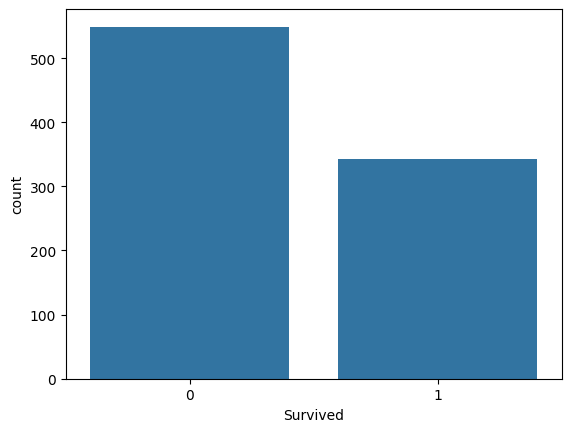

In [73]:
sns.countplot(x='Survived', data=df_train)

In [74]:
df_train['Survived'].value_counts(True)

,proportion
Survived,
0,0.616162
1,0.383838


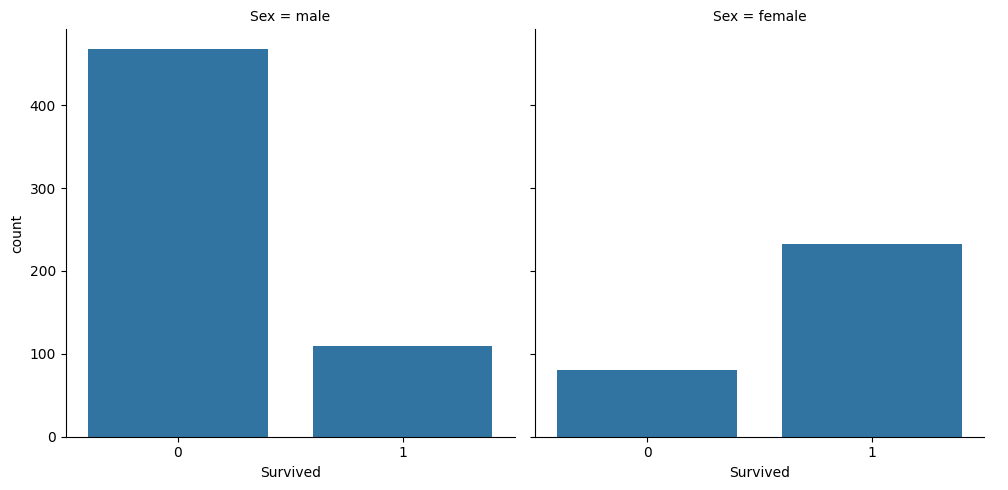

In [75]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train)

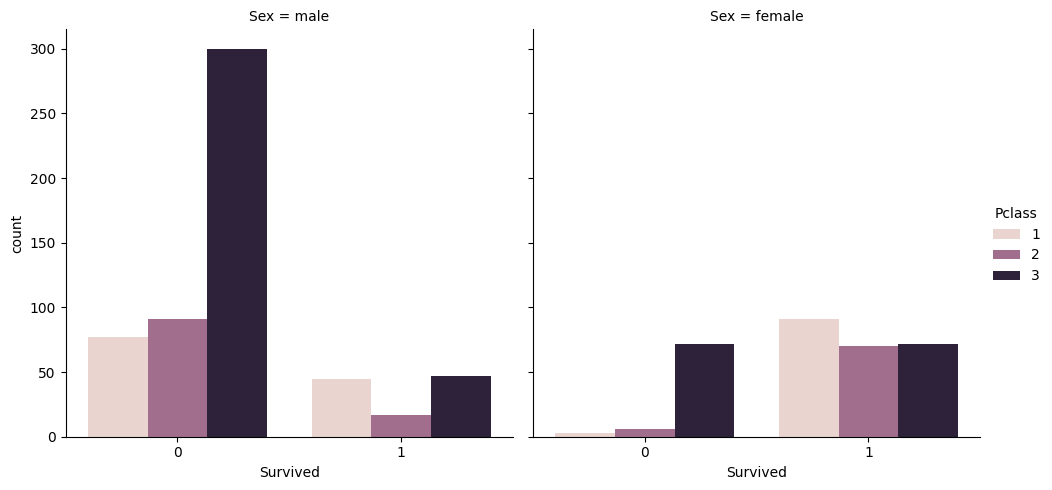

In [76]:
sns.catplot(x='Survived', col='Sex', hue='Pclass', kind='count', data=df_train)

In [77]:
survival_summary = df_train.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
survival_summary['Survival Ratio'] = survival_summary[1] / (survival_summary[0] + survival_summary[1])
survival_summary

Survived,0,1,Survival Ratio
Sex,,,
female,81,233,0.742038
male,468,109,0.188908


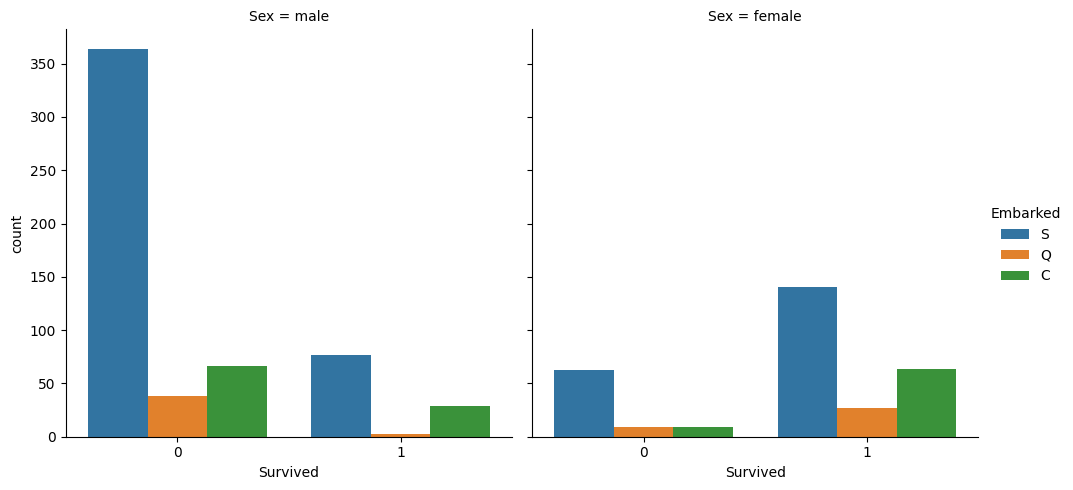

In [78]:
sns.catplot(x='Survived', col='Sex', hue='Embarked', kind='count', data=df_train)

<Axes: xlabel='Pclass', ylabel='Sex'>

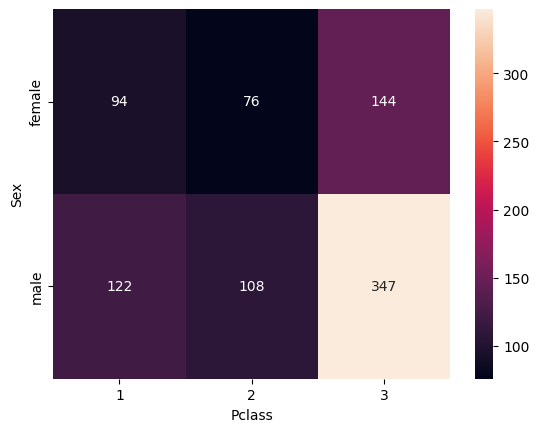

In [79]:
sns.heatmap(pd.crosstab(df_train['Sex'], df_train['Pclass']), annot=True, fmt='d')

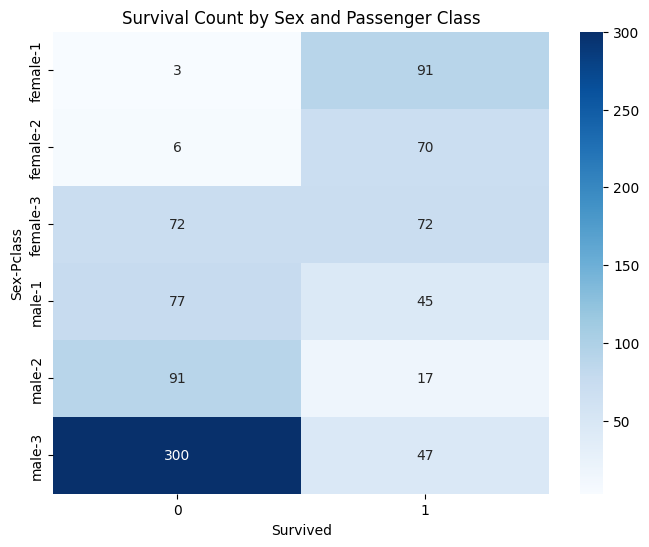

In [80]:
# Crosstab with Sex, Pclass, and Survived
ct = pd.crosstab(
    index=[df_train['Sex'], df_train['Pclass']],
    columns=df_train['Survived']
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Survival Count by Sex and Passenger Class')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

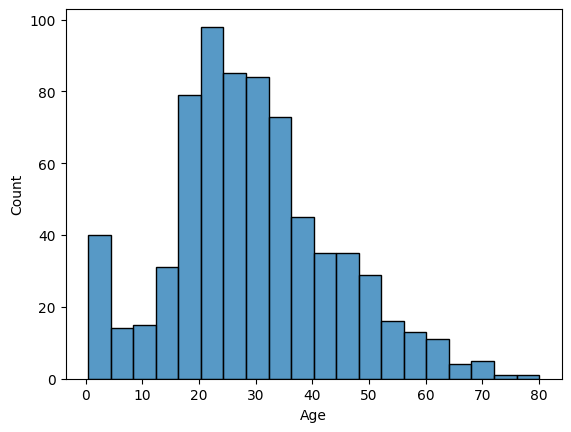

In [81]:
sns.histplot(x='Age', data=df_train)

In [82]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

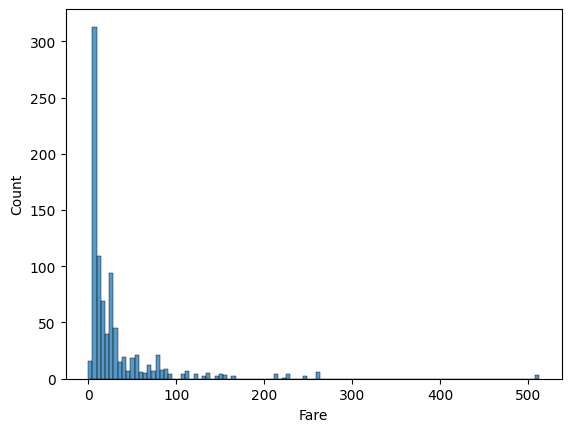

In [83]:
sns.histplot(df_train['Fare'])

#Numerical Data#

<Axes: ylabel='Age'>

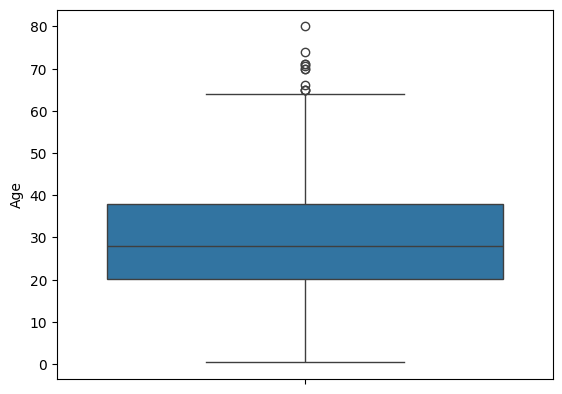

In [84]:
sns.boxplot(df_train['Age'])

<Axes: ylabel='Fare'>

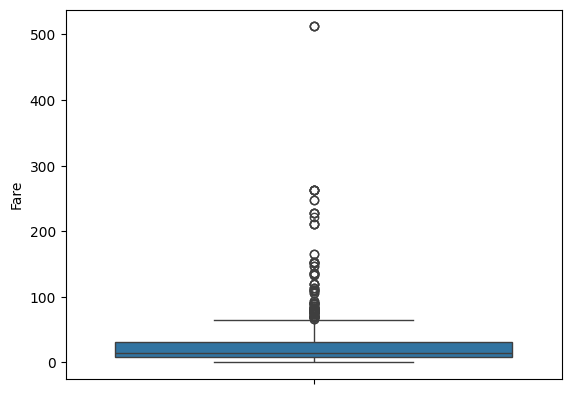

In [85]:
sns.boxplot(df_train['Fare'])

<Axes: xlabel='Age', ylabel='Fare'>

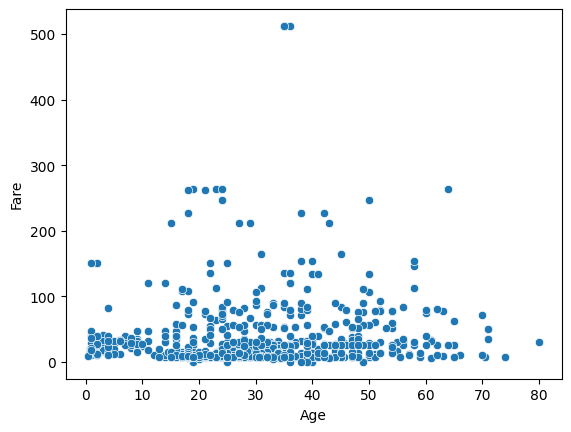

In [86]:
sns.scatterplot(x='Age', y='Fare', data=df_train)

<Axes: xlabel='Age', ylabel='Fare'>

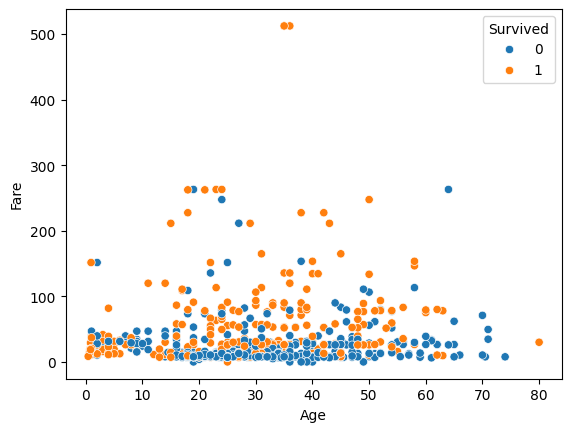

In [87]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train)

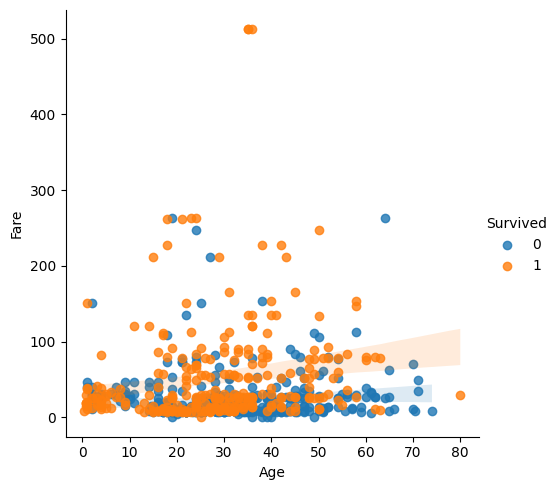

In [88]:
sns.lmplot(x='Age', y='Fare', hue='Survived', line_kws={'visible': False}, data=df_train)

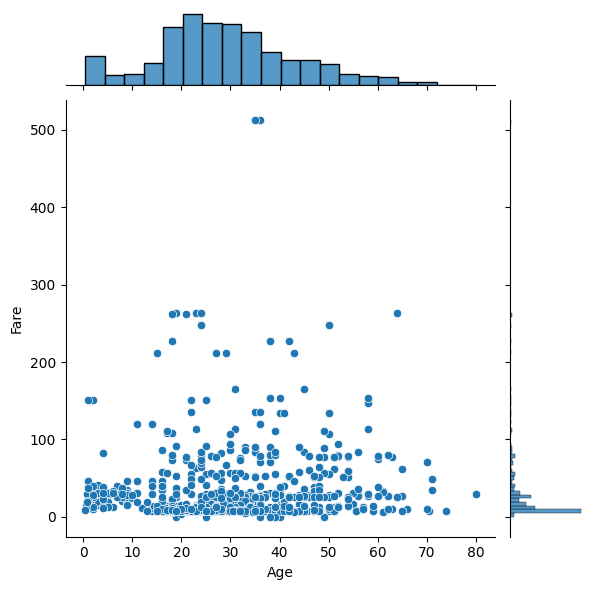

In [89]:
sns.jointplot(x='Age', y='Fare', data=df_train)

<Axes: xlabel='Pclass', ylabel='Age'>

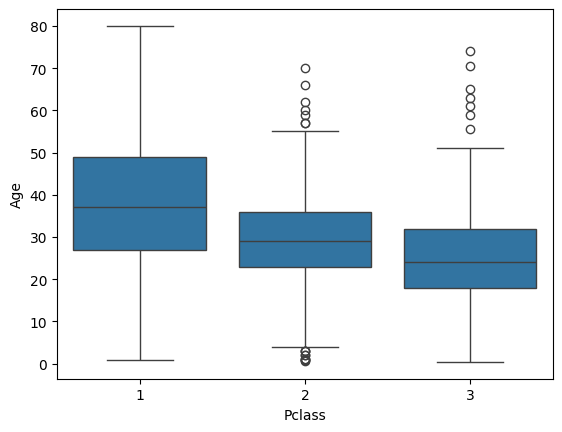

In [90]:
sns.boxplot(x='Pclass', y='Age', data=df_train)

<Axes: xlabel='Sex', ylabel='Age'>

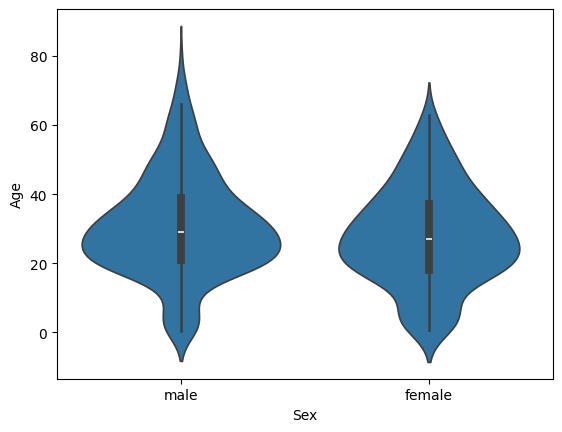

In [91]:
sns.violinplot(x='Sex', y='Age', data=df_train)

<Axes: xlabel='Sex', ylabel='Age'>

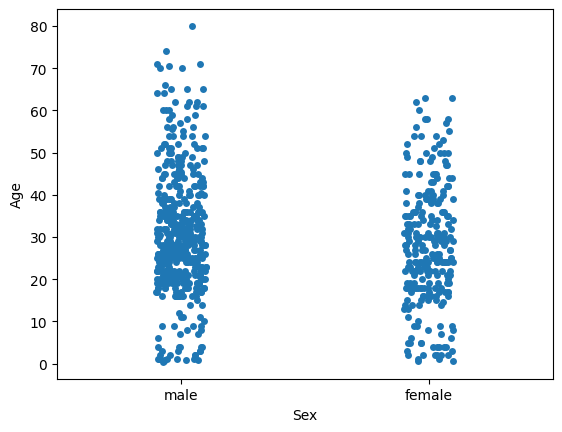

In [92]:
sns.stripplot(x='Sex', y='Age', data=df_train)

<Axes: xlabel='Pclass', ylabel='Age'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


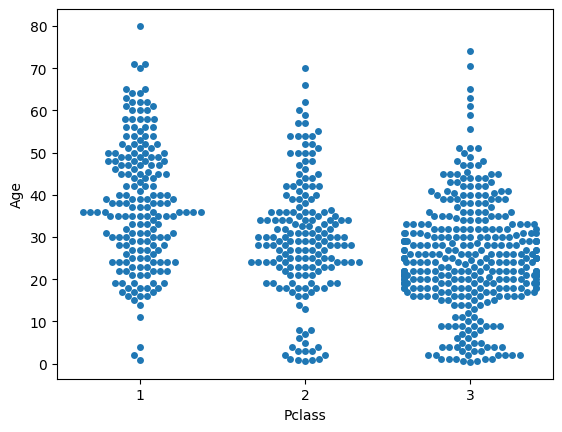

In [93]:
sns.swarmplot(x='Pclass', y='Age', data=df_train)

<Axes: xlabel='Pclass', ylabel='Fare'>

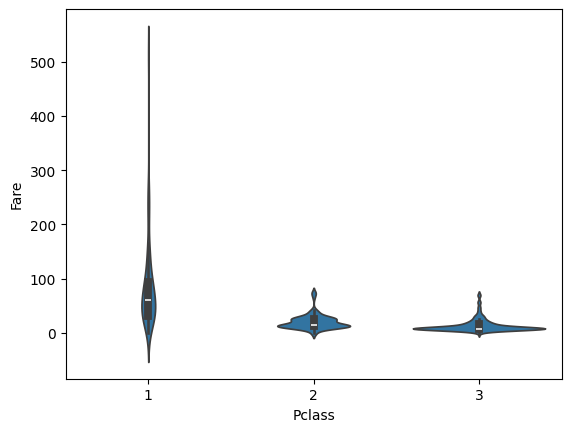

In [94]:
sns.violinplot(x='Pclass', y='Fare', data=df_train)

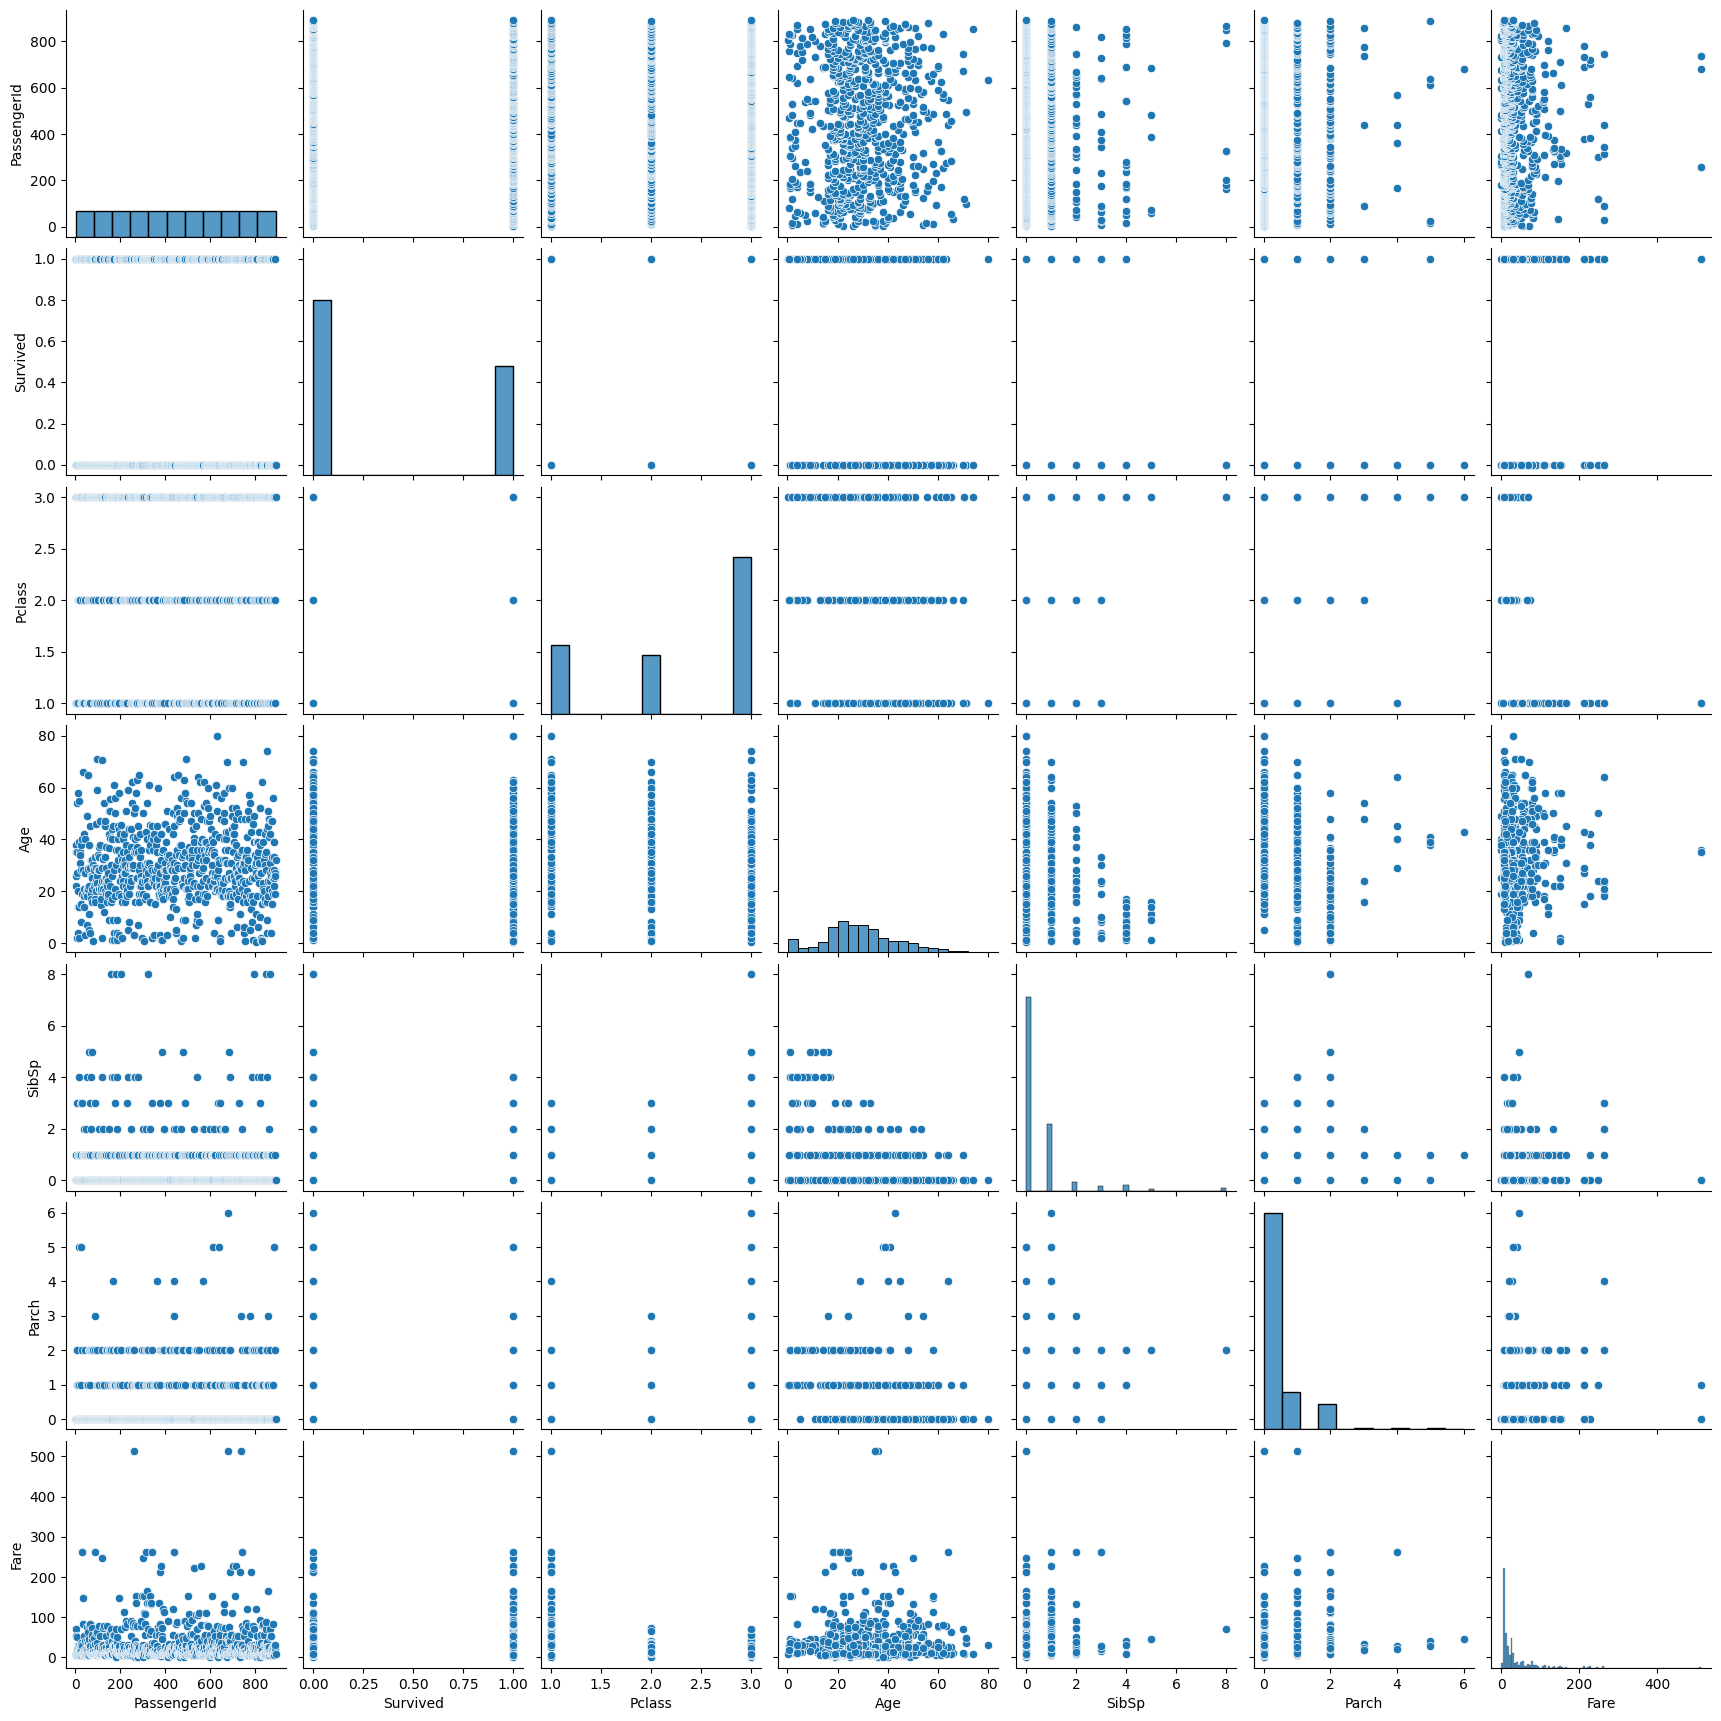

In [95]:
sns.pairplot(df_train)

In [65]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train.['Embarked'].value_counts()

In [ ]:
df_train.shape

In [ ]:
#df_train.['Embarked'].dropna()

In [104]:
df_train['Age'] = df_train.Age.fillna(df_train.Age.median() )
df_train['Fare'] = df_train.Fare.fillna(df_train.Fare.median() )
#df_train['Embarked'] = df_train.Embarked.fillna(df_train.Embarked.median() )

In [99]:
df_train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


# One-hot encoding

In [101]:
# one-hot encoding with get_dummies()
# get_dummies encode value with numbers
# drop_first() is the default
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'],drop_first=True)

In [106]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [105]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [107]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X=df_train[features]
y=df_train['Survived']

In [109]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.8035914702581369

In [111]:
confusion_matrix(y, y_pred)

array([[470,  79],
       [ 96, 246]])

In [113]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.7569230769230769